In [1]:
from numpy import *
from scipy.signal import fftconvolve,convolve2d
from matplotlib.pyplot import *

In [192]:
from itertools import product
from numpy import array,meshgrid,all,unique
from matplotlib.pyplot import plot


class Interval(object) :
    
    def __init__(self,bounds) :

        self.bounds = array(bounds)
        _,self.dim = self.bounds.shape

        self.lower,self.upper = self.bounds
        assert all(self.lower < self.upper), 'lower > upper bound'
            
        self.mesh = meshgrid(*self.bounds.T ,copy=False)
        self.refinements = []
        
        self.refinement_index = list(product([0,1],repeat=self.dim))
        shift = (self.upper-self.lower)/2
        
        self.center = (self.upper+self.lower)/2
        self.shift = array([+shift,-shift])
        self.size = mean(abs(2*shift))

    def refine(self) :
        
        for indexes in self.refinement_index :

            shift = zeros((2,self.dim))
            for i,index in enumerate(indexes) :

                shift[index,i] = self.shift[index,i]

            interval = Interval(self.bounds+shift)
            self.refinements.append(interval)
            
    def isbracket(self,function) :

        evaluation = function(*self.mesh)
        signs = sign(evaluation)
        
        if len(signs.shape) == self.dim :
            return len(unique(signs)) > 1
        
        else :
            return all([ len(unique(s)) > 1 for s in signs ])
    
    def bisect(self,function,precision=0.01) :
        
        if len(self.refinements) > 0 :
            for interval in self.refinements :
                interval.bisect(function,precision)
        
        else :
            if precision < self.size :

                if self.isbracket(function) :
                    self.refine()

                    for interval in self.refinements :
                        interval.bisect(function,precision)
        
    def show(self,function,precision=0.01) :

        if precision > self.size :
            if self.isbracket(function) :
                plot(*self.center,'r.')
#             else :
#                 plot(*self.mesh,'k.',alpha=0.5)

        for interval in self.refinements :
            interval.show(function,precision)

In [208]:
def f(x,y) :
    return x**2 + y**2-0.01-2*abs(sin(x+y)*sin(y-x))

def g(x,y) :
    return x + y -1

def k(x,y) :
    return x - y - 1/3

def h(x,y) :
    return array([f(x,y)])

In [209]:
xyrange = (-2,2)
d = linspace(*xyrange,num=100)
mesh = meshgrid(d,d)

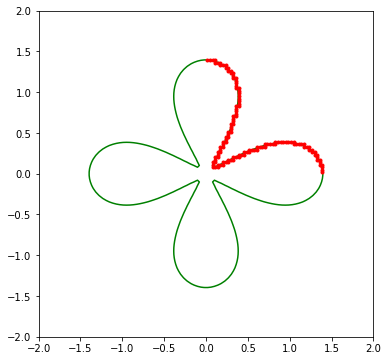

In [211]:
bounds = [[0,0],[2,2]]
precision = 0.05

interval = Interval(bounds)
interval.refine()


interval.bisect(h,precision)

figure(figsize=(6,6))
# contour(*mesh, g(*mesh),levels=[0],colors=['g'])
# contour(*mesh, k(*mesh),levels=[0],colors=['g'])

interval.show(h,precision)
contour(*mesh, f(*mesh),levels=[0],colors=['g'])


In [212]:
interval.refinements[0].refinements[1].refinements[0].shift

IndexError: list index out of range

In [543]:
from scipy.ndimage import laplace

def init_inv_density(x) :
    return arcsin(1-2*x)
    
def init_density(x) :
    return 1-(sin(x)+1)/2
    
init = vectorize(init)
init_density = vectorize(init_density)

dt = 0.000001
dx = 0.01
invdx = 0.001

x = arange(-pi/2,3*pi/2,dx)
rho = init_density(x)

invx = arange(-1,2,invdx)
invrho = init_inv_density(invx)

# p = arange(-1,2,dp)
# G = init(p)

# bin_edges = linspace(-1,2,100)
# bin_centers = (bin_edges[1:]+bin_edges[:-1])/2

# nanmask = ~isnan(G)*~isinf(G)
# G = G[nanmask]; p = p[nanmask]

/home/gszep/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arcsin
  after removing the cwd from sys.path.


/home/gszep/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/home/gszep/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in true_divide
  del sys.path[0]


(-1, 2)

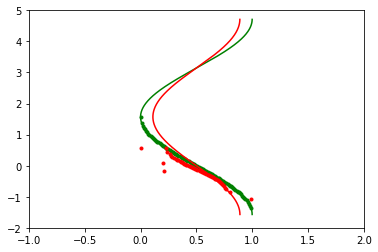

In [544]:
# gamma,_ = histogram(rho,bins=bin_edges,density=True)
plot(rho,x,'g-') 
plot(invx,invrho,'g.')


for i in range(25000) :
    
    rho += laplace(rho,mode='nearest')/dx**2 * dt
    
    nanmask = ~isnan(invrho)*~isinf(invrho)
    invrho = invrho[nanmask]; invx = invx[nanmask]

    invrho += laplace(invrho)/gradient(invrho)**2 * dt
#     G += laplace(-1./G,mode='constant',cval=0)/dp**2 * dt

# gamma,_ = histogram(rho,bins=bin_edges,density=True)
# plot(bin_centers,gamma,'r-') 
# plot(p,G,'r.')

plot(rho,x,'r-') 
plot(invx,invrho,'r.')

ylim(-2,5)
xlim(-1,2)

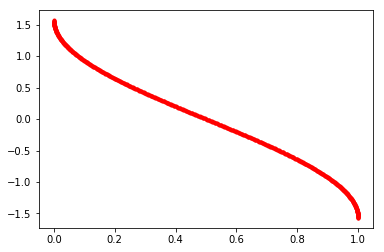

In [534]:
plot(invx,invrho,'r.')

In [429]:
laplace?

(-2, 2)

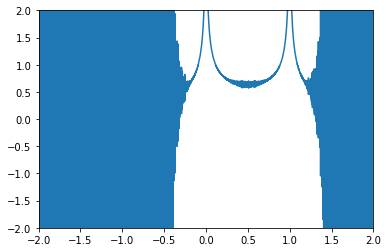

In [8]:
for i in range(1) :
    
    F = -1./G
    F[isinf(F)] = 0.0
    
    G += laplace(F,mode='nearest')/dx**2 * dt
    
    plot(x,G)
        

ylim(-2,2)
xlim(-2,2)

In [332]:
laplace?